In [1]:
!pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/ad/1e/62ed77dbb887a963c788c61dc6e740c1d16462fcdd37acf247099f1a911b/ultralytics-8.0.229-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 13.0 MB/s eta 0:00:00a 0:00:01


In [2]:
import json

f = open('/kaggle/input/data-deep/coco_minitrain_25k/annotations/instances_minitrain2017.json')
anns = json.load(f)
print(anns.keys())

dict_keys(['images', 'info', 'licenses', 'annotations', 'categories'])


In [3]:
# Write to yaml file for yolov8
from ruamel.yaml import YAML

In [4]:
img_path = "/kaggle/input/data-deep/coco_minitrain_25k/images/"
data = {"path": "/kaggle/input/data-deep/coco_minitrain_25k", 
        "train": img_path + "train2017", 
        "val": img_path + "val2017", 
        "names": {}}
id = 0
for ann in anns['categories']:
    data["names"][id] = ann['name']
    id += 1

In [5]:
print(data)

{'path': '/kaggle/input/data-deep/coco_minitrain_25k', 'train': '/kaggle/input/data-deep/coco_minitrain_25k/images/train2017', 'val': '/kaggle/input/data-deep/coco_minitrain_25k/images/val2017', 'names': {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'don

In [5]:
yaml = YAML()
file_path = "example.yaml"

# Write to the YAML file
with open(file_path, "w") as file:
    yaml.dump(data, file)

In [6]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

metrics = model.val(data="/kaggle/working/example.yaml")  # evaluate model performance on the validation set

100%|██████████| 6.23M/6.23M [00:00<00:00, 21.1MB/s]


Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 4.26MB/s]
val: Scanning /kaggle/input/data-deep/coco_minitrain_25k/labels/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:15<00:00, 323.70it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/data-deep/coco_minitrain_25k/labels is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:41<00:00,  7.53it/s]


                   all       5000      36335      0.633      0.475      0.521      0.371
                person       5000      10777      0.754      0.673      0.745      0.514
               bicycle       5000        314      0.687      0.392      0.457      0.265
                   car       5000       1918      0.646      0.515      0.561      0.364
            motorcycle       5000        367       0.71       0.58      0.655      0.414
              airplane       5000        143      0.814      0.766      0.832      0.653
                   bus       5000        283      0.746      0.643      0.739       0.62
                 train       5000        190      0.798       0.77      0.834      0.646
                 truck       5000        414      0.549      0.399      0.435      0.293
                  boat       5000        424      0.583        0.3      0.377       0.21
         traffic light       5000        634      0.644      0.345      0.409      0.211
          fire hydran

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val


In [7]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(data="/kaggle/working/example.yaml", epochs = 1)
metrics = model.val()  # evaluate model performance on the validation set
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
path = model.export(format="pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 243MB/s]


Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/example.yaml, epochs=1, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=N

100%|██████████| 755k/755k [00:00<00:00, 89.1MB/s]
2023-12-20 12:27:28,857	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-12-20 12:27:29,687	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/data-deep/coco_minitrain_25k/labels/train2017... 25000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25000/25000 [01:07<00:00, 369.19it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/data-deep/coco_minitrain_25k/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/data-deep/coco_minitrain_25k/labels/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:13<00:00, 359.42it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/data-deep/coco_minitrain_25k/labels is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.58G      1.162      1.358       1.22        148        640: 100%|██████████| 1563/1563 [05:41<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:48<00:00,  3.24it/s]


                   all       5000      36335      0.615      0.459      0.497      0.347

1 epochs completed in 0.112 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:42<00:00,  3.70it/s]


                   all       5000      36335      0.616      0.459      0.497      0.347
                person       5000      10777      0.775      0.638      0.731        0.5
               bicycle       5000        314      0.672      0.363      0.426      0.243
                   car       5000       1918      0.676      0.494      0.546      0.349
            motorcycle       5000        367      0.724      0.545      0.619      0.384
              airplane       5000        143      0.719      0.748      0.802      0.611
                   bus       5000        283      0.732      0.625      0.714      0.595
                 train       5000        190      0.785      0.753      0.819      0.598
                 truck       5000        414      0.635      0.314      0.432      0.286
                  boat       5000        424      0.575      0.287      0.356      0.189
         traffic light       5000        634      0.608      0.352      0.402      0.199
          fire hydran

lr/pg0,▁
lr/pg1,▁
lr/pg2,▁
metrics/mAP50(B),▁
metrics/mAP50-95(B),▁
metrics/precision(B),▁
metrics/recall(B),▁
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▁


Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /kaggle/input/data-deep/coco_minitrain_25k/labels/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:04<00:00, 1026.49it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/data-deep/coco_minitrain_25k/labels is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  6.99it/s]


                   all       5000      36335      0.616      0.459      0.497      0.347
                person       5000      10777      0.776      0.637      0.731        0.5
               bicycle       5000        314      0.672      0.363      0.427      0.242
                   car       5000       1918      0.677      0.493      0.545       0.35
            motorcycle       5000        367      0.718      0.548      0.618      0.385
              airplane       5000        143      0.705      0.748      0.804      0.609
                   bus       5000        283      0.735      0.627      0.711      0.594
                 train       5000        190      0.786      0.753       0.82      0.604
                 truck       5000        414      0.628       0.31       0.43      0.286
                  boat       5000        424      0.565      0.285      0.354      0.189
         traffic light       5000        634      0.608       0.35      0.398      0.199
          fire hydran

100%|██████████| 476k/476k [00:00<00:00, 50.3MB/s]

image 1/1 /kaggle/working/bus.jpg: 640x480 3 persons, 1 bus, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


ValueError: Invalid export format='pt'. Valid formats are ('torchscript', 'onnx', 'openvino', 'engine', 'coreml', 'saved_model', 'pb', 'tflite', 'edgetpu', 'tfjs', 'paddle', 'ncnn')


image 1/1 /kaggle/input/data-deep/coco_minitrain_25k/images/val2017/000000000802.jpg: 640x448 1 oven, 2 refrigerators, 65.4ms
Speed: 1.6ms preprocess, 65.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


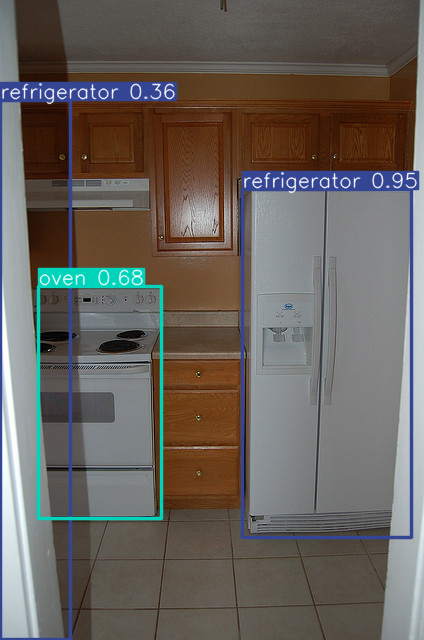

In [8]:
from PIL import Image
from IPython.display import display
results = model('/kaggle/input/data-deep/coco_minitrain_25k/images/val2017/000000000802.jpg')  # results list

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    display(im)  # show image